<a href="https://colab.research.google.com/github/Ricardo1914/T334_M35CD_Jose_Ricardo/blob/main/Trabalho_M_A_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

# Parte I - Análise Estatística

1. Realize uma análise estatística inicial do conjunto de dados, obtendo medidas como média, mediana, mínimo, máximo, dentre outras medidas que julgue adequadas. Em seguida, interprete os resultados, comentando sobre a distribuição e as tendências centrais das variáveis.


Estatísticas descritivas gerais:
         cpu_cores      ram_gb  latencia_ms  armazenamento_tb  tempo_resposta
count  190.000000  189.000000   171.000000        171.000000      190.000000
mean     8.563158    8.888889   141.308363          0.987883      145.840632
std      4.251823    4.170991    88.390811          0.649145      101.056080
min      2.000000    4.000000     1.840000          0.256000       49.650000
25%      5.000000    5.000000    57.620000          0.512000       68.657500
50%      8.000000    8.000000   135.900000          1.000000      107.005000
75%     12.750000   13.000000   220.540000          1.500000      178.157500
max     15.000000   18.000000   290.640000          2.000000      406.880000

Medianas:
cpu_cores             8.000
ram_gb                8.000
latencia_ms         135.900
armazenamento_tb      1.000
tempo_resposta      107.005
dtype: float64

Valores únicos por variável categórica:
sistema_operacional: ['MacOS' 'Linux' 'Windows']
tipo_hd: ['HDD' '

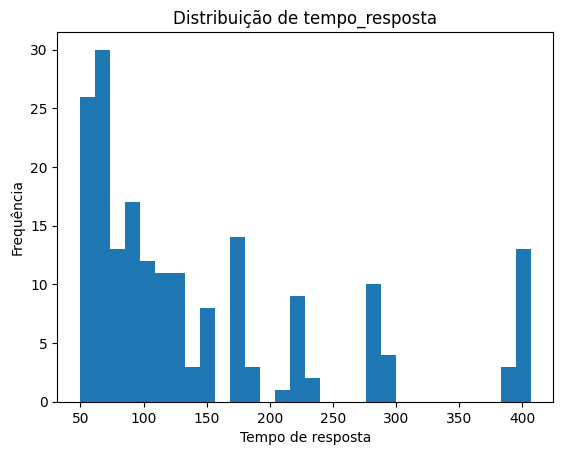

In [ ]:
df = pd.read_csv('dataset_12.csv')

estatisticas = df.describe()
print("Estatísticas descritivas gerais:\n", estatisticas)

print("\nMedianas:")
print(df.median(numeric_only=True))

print("\nValores únicos por variável categórica:")
for col in ['sistema_operacional', 'tipo_hd', 'tipo_processador']:
    print(f"{col}: {df[col].unique()}")

plt.hist(df['tempo_resposta'].dropna(), bins=30)
plt.title('Distribuição de tempo_resposta')
plt.xlabel('Tempo de resposta')
plt.ylabel('Frequência')
plt.show()

# Parte II - Modelo e Diagnóstico

2. Ajuste um modelo de regressão linear múltipla considerando:

● Variável dependente: tempo_resposta

● Variáveis explicativas: demais variáveis

3. Informe (de acordo com as técnicas, abordagens e testes vistos em sala de aula):

● O valor do intercepto e dos coeficientes estimados.

● O valor de R² e R² ajustado.

● Os valores de testes para interpretação dos coeficientes e do modelo de forma global.

4. Sobre as variáveis categóricas:

● Como você tratou as variáveis categóricas do seu dataset (Mencione também quais foram as
variáveis categóricas)?

● Qual categoria base foi considerada para cada uma?

● Interprete os coeficientes associados a essas categorias.

5. Faça o diagnóstico de multicolinearidade:● Calcule o(s) fator(es) que auxiliam no diagnóstico de multicolinearidade, de acordo com o que
foi visto em sala de aula.

● Interprete: existe multicolinearidade? Alguma ação seria necessária?

6. Faça o diagnóstico de heterocedasticidade:

● Elabore os gráficos e testes pertinentes para o diagnóstico da heterocedasticidade.

● Interprete os resultados.

                            OLS Regression Results                            
Dep. Variable:         tempo_resposta   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     76.44
Date:                Tue, 06 May 2025   Prob (F-statistic):           2.00e-45
Time:                        16:41:03   Log-Likelihood:                -716.47
No. Observations:                 139   AIC:                             1451.
Df Residuals:                     130   BIC:                             1477.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


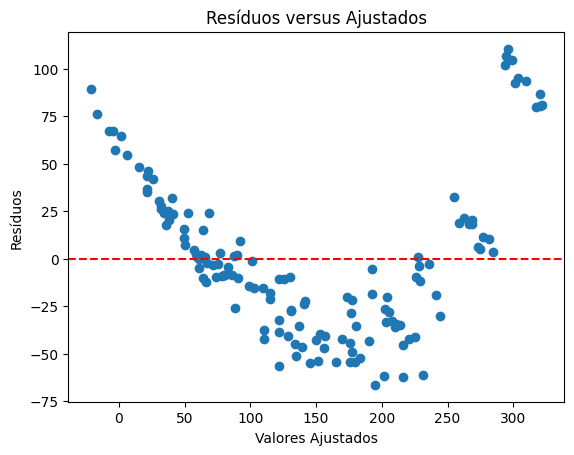

Breusch-Pagan: estatística=23.558574887860125, p-valor=0.0050565492095540465


In [ ]:
formula = 'tempo_resposta ~ cpu_cores + ram_gb + latencia_ms + armazenamento_tb + C(sistema_operacional) + C(tipo_hd) + C(tipo_processador)'

y, X = dmatrices(formula, data=df, return_type="dataframe")

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

print("Colunas do modelo:", X.columns)
for col in ['sistema_operacional', 'tipo_hd', 'tipo_processador']:
    print(f"Categoria base de {col}: {sorted(df[col].dropna().unique())[0]}")

vif = pd.DataFrame()
vif["variavel"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

residuos = modelo.resid
ajustados = modelo.fittedvalues

plt.scatter(ajustados, residuos)
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos versus Ajustados")
plt.axhline(0, color='red', linestyle='--')
plt.show()

from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuos, modelo.model.exog)
print(f"Breusch-Pagan: estatística={bp_test[0]}, p-valor={bp_test[1]}")

# Parte III – Análise Crítica
7. Compare dois modelos:

● Modelo 1: com todas as variáveis.

● Modelo 2: excluindo uma variável (ou variáveis). Explique o motivo da exclusão dessa variável.


● Compare o R² ajustado e o teste F entre os modelos.

● Justifique qual modelo você recomendaria utilizar.

● Quais ações práticas você sugeriria para melhorar o tempo de resposta do sistema?
Considere aspectos como escolha de hardware e possíveis gargalos identificados

In [ ]:
# Modelo 2: excluindo 'latencia_ms'
formula2 = 'tempo_resposta ~ cpu_cores + ram_gb + armazenamento_tb + C(sistema_operacional) + C(tipo_hd) + C(tipo_processador)'
y2, X2 = dmatrices(formula2, data=df, return_type="dataframe")

modelo2 = sm.OLS(y2, X2).fit()
print(modelo2.summary())

print(modelo.compare_f_test(modelo2))

                            OLS Regression Results                            
Dep. Variable:         tempo_resposta   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     94.74
Date:                Tue, 06 May 2025   Prob (F-statistic):           7.07e-51
Time:                        16:46:04   Log-Likelihood:                -792.48
No. Observations:                 153   AIC:                             1601.
Df Residuals:                     145   BIC:                             1625.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
